Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


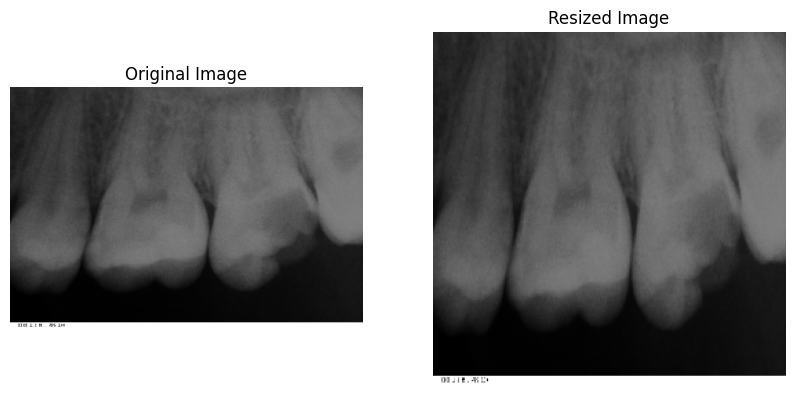

In [40]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Define the path to your image file in Google Drive
image_path = '/content/drive/MyDrive/HCA/29.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Resize the image to the desired dimensions
width, height = 256, 256  # Example dimensions
resized_image = cv2.resize(image, (width, height))

# Convert the BGR image (OpenCV default) to RGB for proper visualization with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Plot both images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image_rgb)
plt.title("Resized Image")
plt.axis('off')

plt.show()


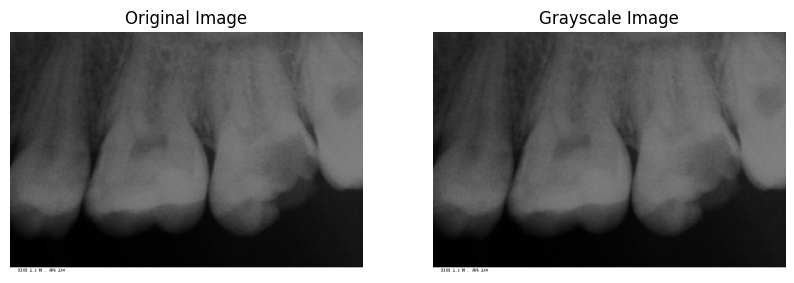

In [41]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot both original and grayscale images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

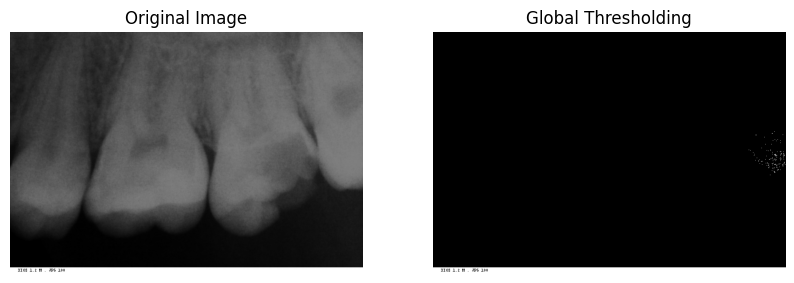

In [42]:
# Apply global thresholding
threshold_value = 127
_, global_thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Plot the original and thresholded images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Global Thresholded image
plt.subplot(1, 2, 2)
plt.imshow(global_thresholded, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')

plt.show()

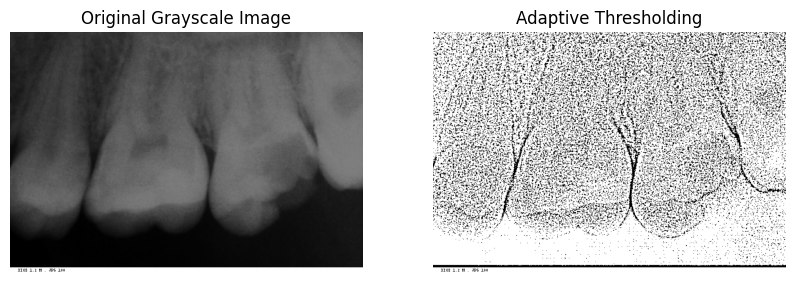

In [43]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresholded = cv2.adaptiveThreshold(gray_image, 255,
                                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

# Plot the original and adaptive thresholded images
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Adaptive Thresholded image
plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresholded, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')

plt.show()

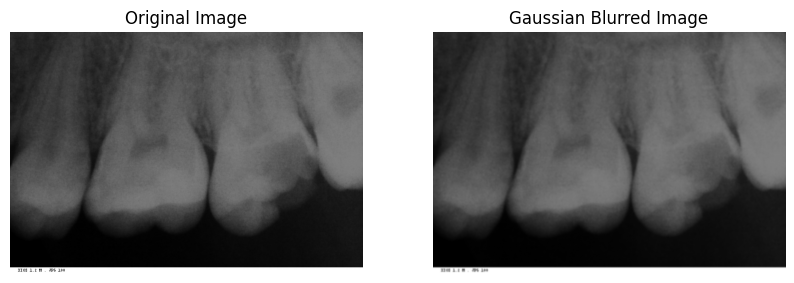

In [44]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
# The kernel size should be odd (e.g., (5, 5), (7, 7), etc.)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Plot the original and blurred images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')

plt.show()

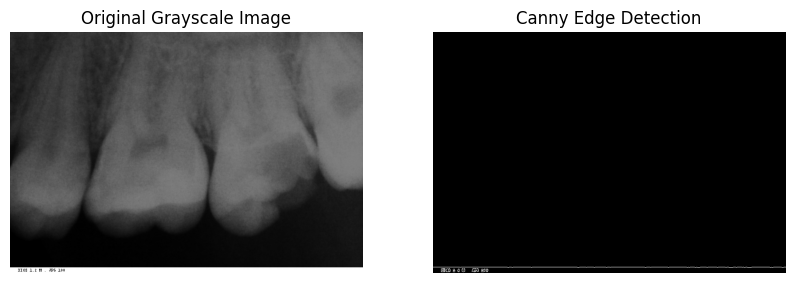

In [45]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

# Plot the original and edge-detected images
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Canny edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.show()

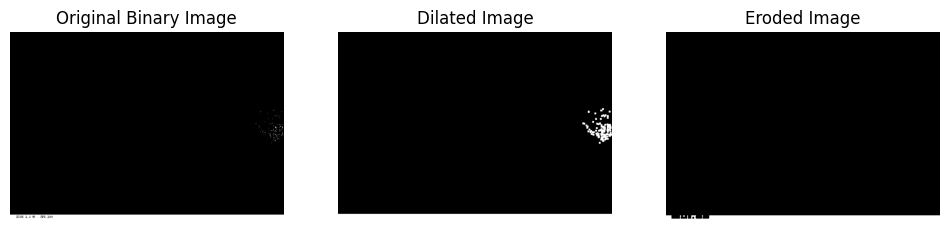

In [46]:
import numpy as np

# Threshold the image to make it binary (optional, if the image is not binary)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Apply Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Apply Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Plot the original, dilated, and eroded images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')

# Dilated image
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')

# Eroded image
plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

plt.show()

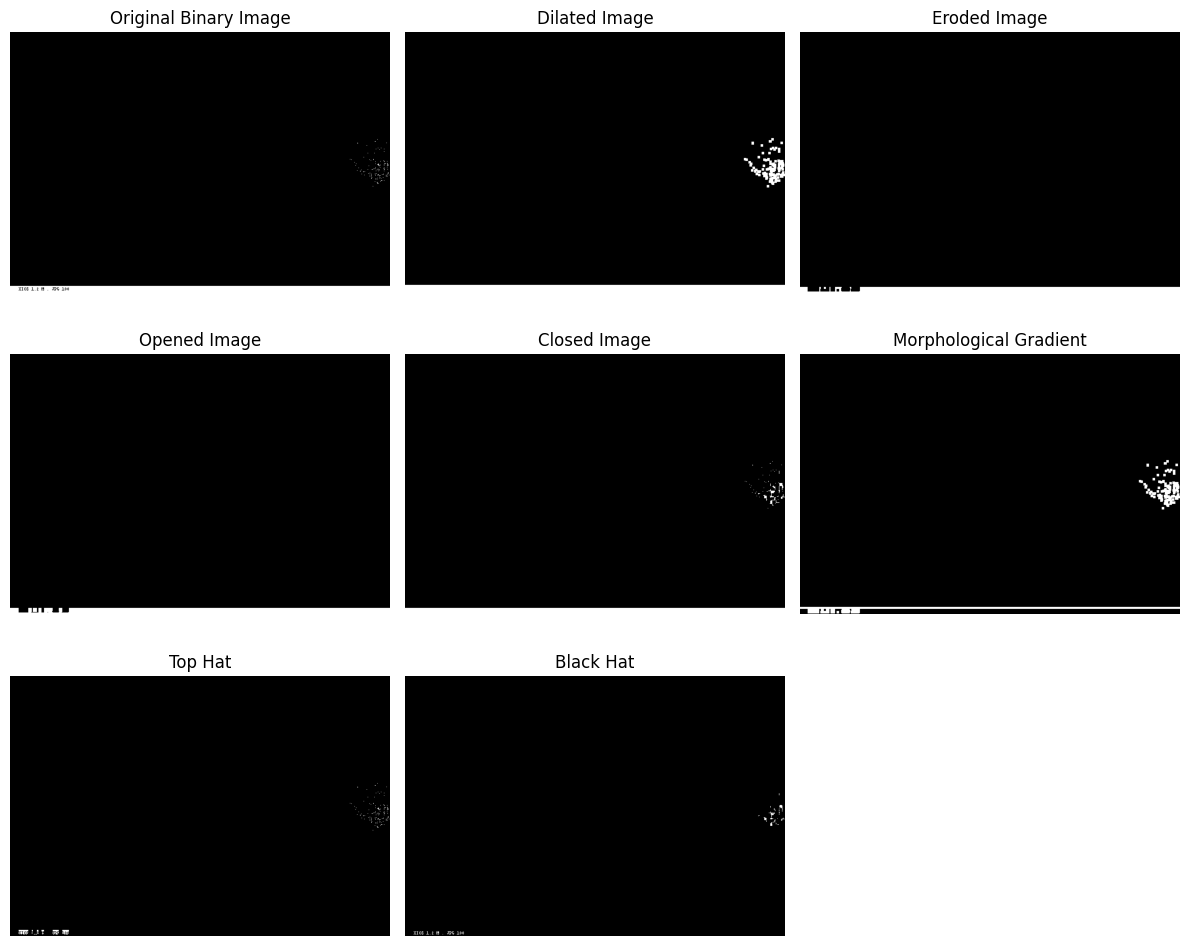

In [47]:
# Threshold the image to make it binary (optional if not already binary)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Apply Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Apply Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Apply Opening (Erosion followed by Dilation)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Apply Closing (Dilation followed by Erosion)
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Apply Morphological Gradient (Dilation - Erosion)
morph_gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)

# Apply Top Hat (Original image - Opening)
top_hat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)

# Apply Black Hat (Closing - Original image)
black_hat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

# Plot all the images for comparison
plt.figure(figsize=(12, 10))

# Original binary image
plt.subplot(3, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')

# Dilated image
plt.subplot(3, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')

# Eroded image
plt.subplot(3, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

# Opened image
plt.subplot(3, 3, 4)
plt.imshow(opened_image, cmap='gray')
plt.title("Opened Image")
plt.axis('off')

# Closed image
plt.subplot(3, 3, 5)
plt.imshow(closed_image, cmap='gray')
plt.title("Closed Image")
plt.axis('off')

# Morphological Gradient
plt.subplot(3, 3, 6)
plt.imshow(morph_gradient, cmap='gray')
plt.title("Morphological Gradient")
plt.axis('off')

# Top Hat
plt.subplot(3, 3, 7)
plt.imshow(top_hat, cmap='gray')
plt.title("Top Hat")
plt.axis('off')

# Black Hat
plt.subplot(3, 3, 8)
plt.imshow(black_hat, cmap='gray')
plt.title("Black Hat")
plt.axis('off')

plt.tight_layout()
plt.show()

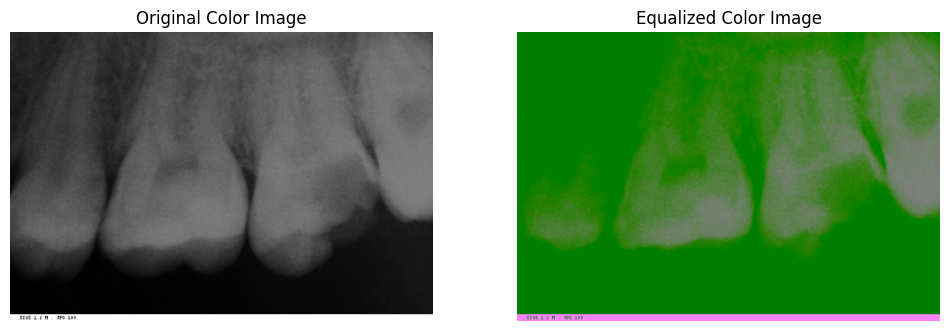

In [48]:
# Convert the image to YUV color space
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Apply histogram equalization only on the Y channel (luminance channel)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert back to BGR color space
equalized_color_image = cv2.cvtColor(image, cv2.COLOR_YUV2BGR)

# Plot the original and equalized color images
plt.figure(figsize=(12, 6))

# Original color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title("Original Color Image")
plt.axis('off')

# Equalized color image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB))
plt.title("Equalized Color Image")
plt.axis('off')

plt.show()

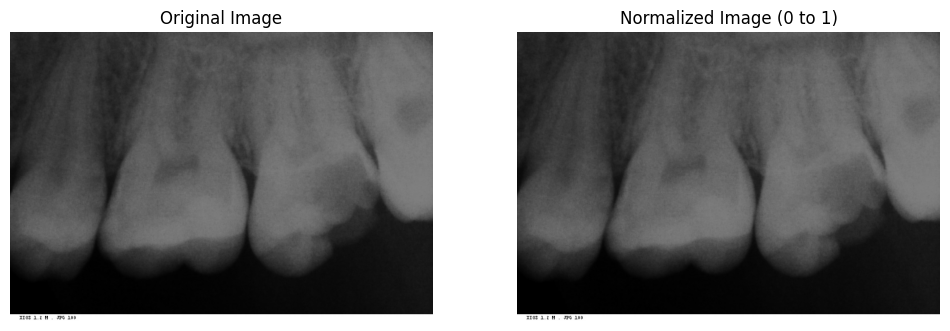

In [49]:
# Convert the image to float32 and normalize to [0, 1]
image_normalized_01 = image.astype('float32') / 255.0

# Plot the original and normalized images
plt.figure(figsize=(12, 6))

# Original image (converted to RGB for display with matplotlib)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title("Original Image")
plt.axis('off')

# Normalized image
plt.subplot(1, 2, 2)
plt.imshow(image_normalized_01)
plt.title("Normalized Image (0 to 1)")
plt.axis('off')

plt.show()

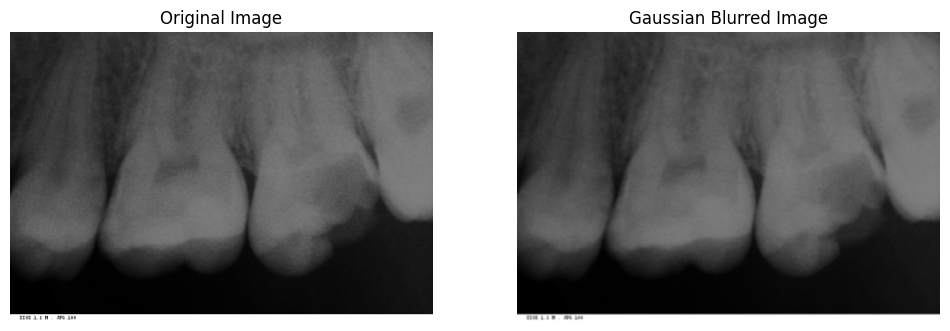

In [50]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Plot the original and blurred images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')

plt.show()

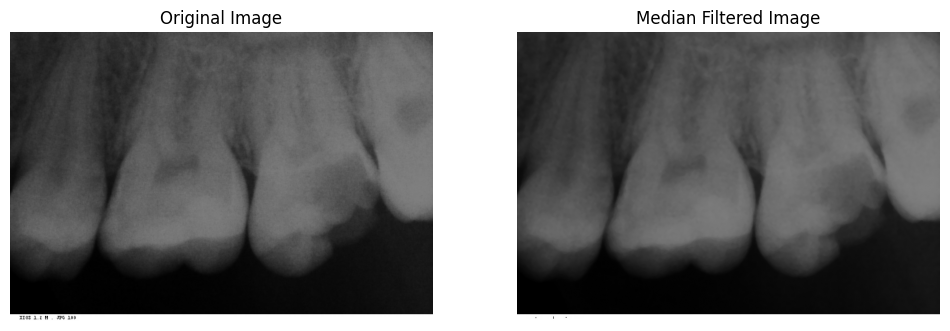

In [51]:
# Apply Median Filtering
median_filtered_image = cv2.medianBlur(gray_image, 5)

# Plot the original and median filtered images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Median filtered image
plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')

plt.show()

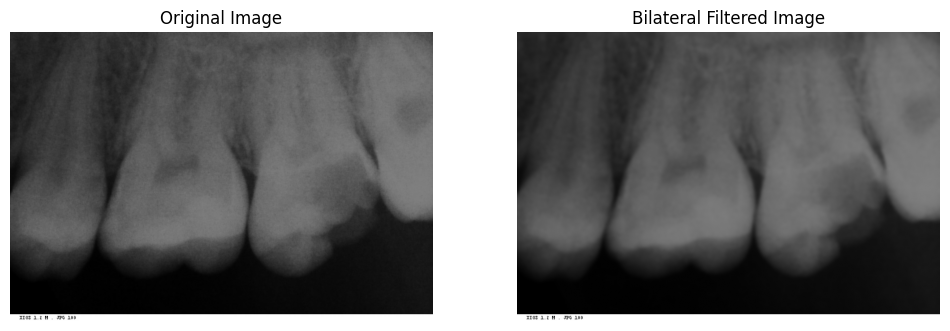

In [52]:
# Apply Bilateral Filtering
bilateral_filtered_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Plot the original and bilateral filtered images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Bilateral filtered image
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title("Bilateral Filtered Image")
plt.axis('off')

plt.show()

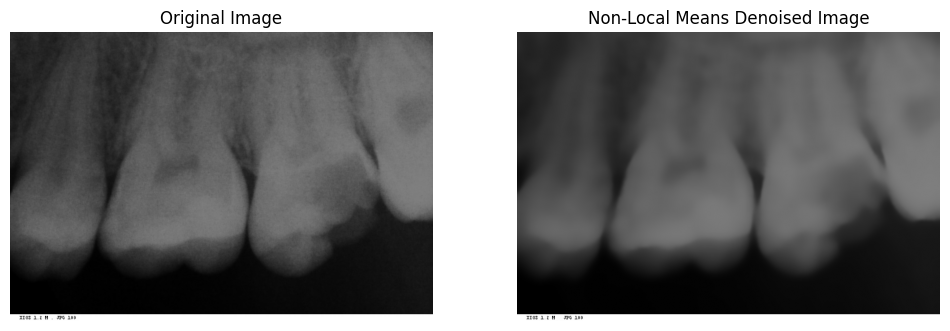

In [53]:
# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 21)

# Plot the original and denoised images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Non-Local Means Denoised Image")
plt.axis('off')

plt.show()

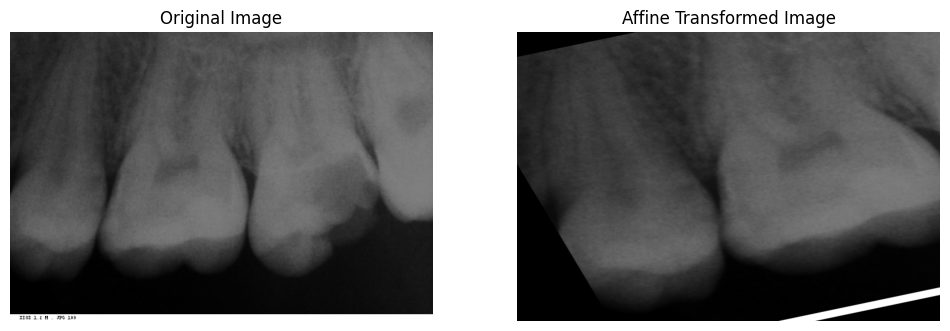

In [54]:
# Define the points for the affine transformation
# These are the points in the original image
points_original = np.float32([[50, 50], [200, 50], [50, 200]])

# These are the points in the transformed image
points_transformed = np.float32([[10, 100], [250, 50], [100, 250]])

# Get the affine transformation matrix
matrix = cv2.getAffineTransform(points_original, points_transformed)

# Apply the affine transformation
transformed_image = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

# Plot the original and transformed images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Affine Transformed Image")
plt.axis('off')

plt.show()

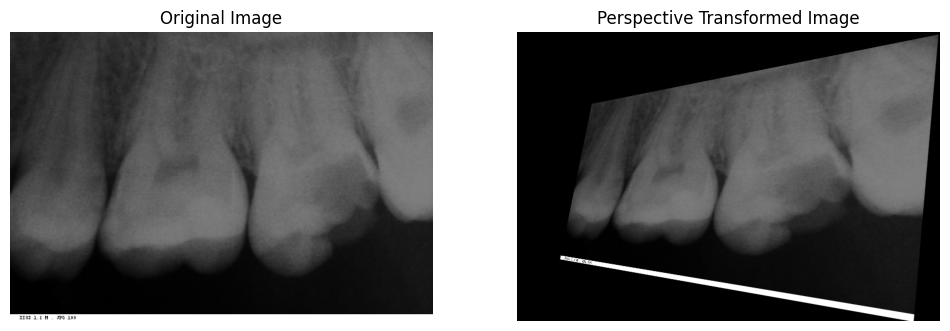

In [55]:
# Define the points for the perspective transformation
# These are the points in the original image
points_original_perspective = np.float32([[50, 50], [500, 50], [50, 500], [500, 500]])

# These are the points in the transformed image
points_transformed_perspective = np.float32([[150, 150], [450, 100], [100, 400], [400, 450]])

# Get the perspective transformation matrix
perspective_matrix = cv2.getPerspectiveTransform(points_original_perspective, points_transformed_perspective)

# Apply the perspective transformation
perspective_transformed_image = cv2.warpPerspective(image, perspective_matrix, (image.shape[1], image.shape[0]))

# Plot the original and transformed images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Perspective transformed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(perspective_transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Perspective Transformed Image")
plt.axis('off')

plt.show()

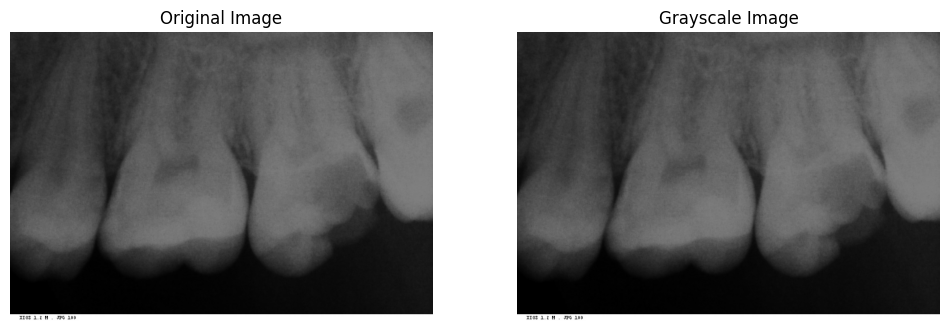

In [56]:
# Convert the image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the original and grayscale images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

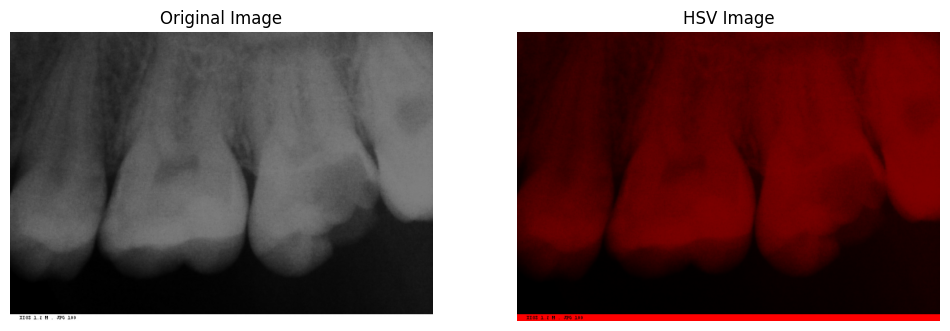

In [57]:
# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Plot the original and HSV images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# HSV image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
plt.title("HSV Image")
plt.axis('off')

plt.show()


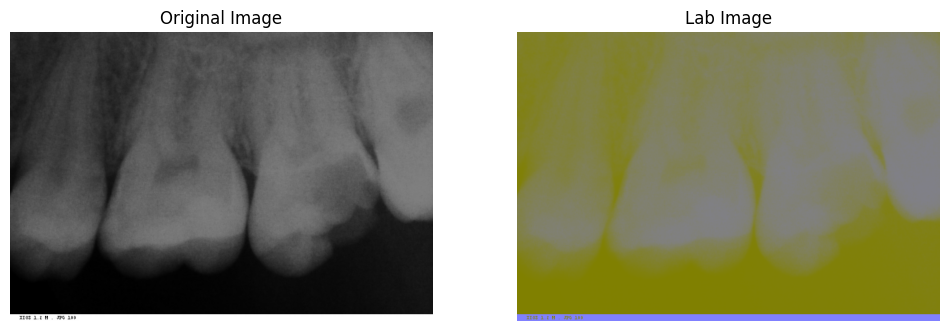

In [58]:
# Convert the image to Lab
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Plot the original and Lab images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Lab image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(lab_image, cv2.COLOR_BGR2RGB))
plt.title("Lab Image")
plt.axis('off')

plt.show()


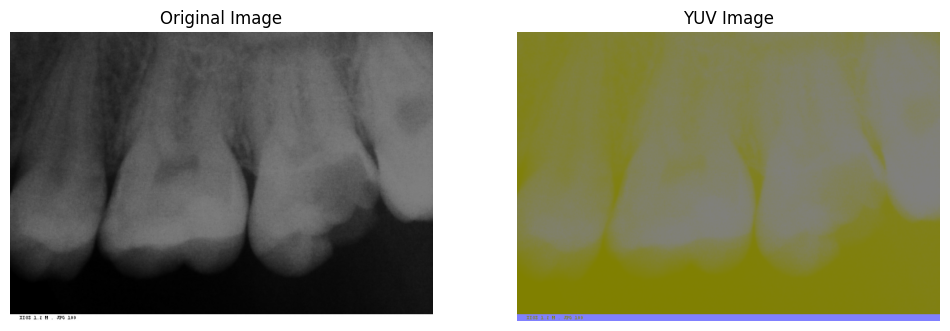

In [59]:
# Convert the image to YUV
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Plot the original and YUV images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# YUV image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(yuv_image, cv2.COLOR_BGR2RGB))
plt.title("YUV Image")
plt.axis('off')

plt.show()


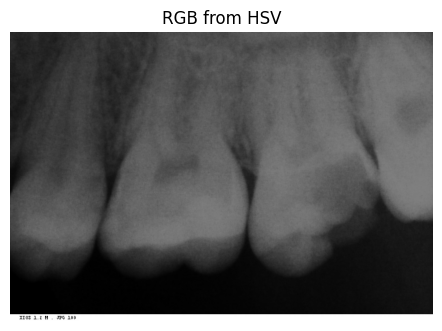

In [60]:
# Convert the image from HSV to RGB
rgb_from_hsv = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Plot the original and converted images
plt.figure(figsize=(12, 6))

# Original image (HSV to RGB)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_from_hsv, cv2.COLOR_BGR2RGB))
plt.title("RGB from HSV")
plt.axis('off')

plt.show()


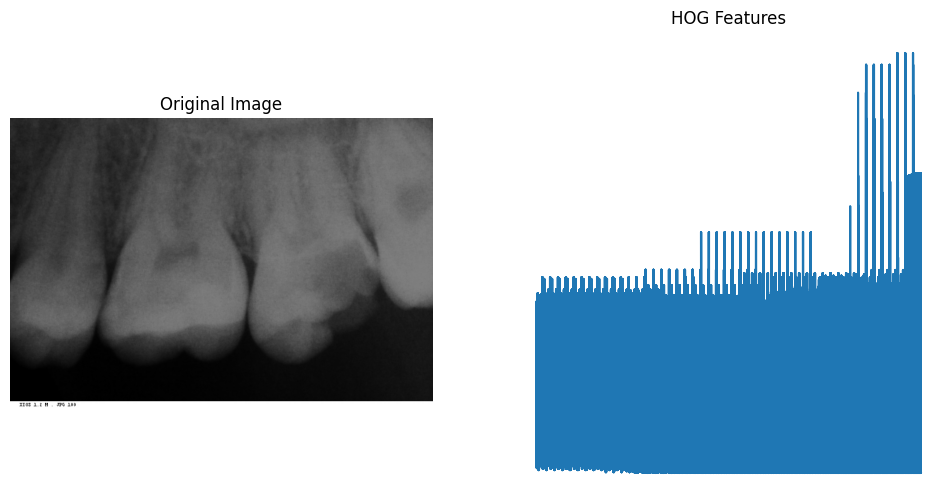

In [61]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a HOG descriptor
hog = cv2.HOGDescriptor()

# Compute HOG features
features = hog.compute(gray)

# Plot original image and HOG features
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Visualize the HOG features (just a dummy example, not actual visualization of HOG)
plt.subplot(1, 2, 2)
plt.plot(features)
plt.title("HOG Features")
plt.axis('off')

plt.show()

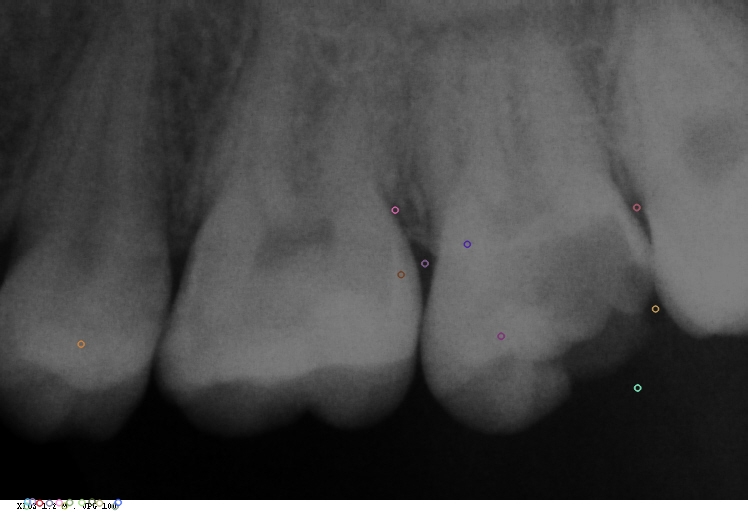

In [63]:
from google.colab.patches import cv2_imshow

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints using cv2_imshow
cv2_imshow(image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

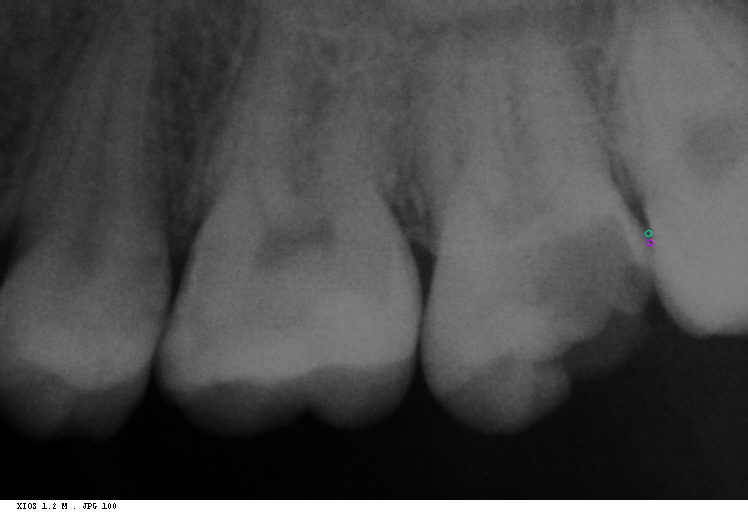

In [65]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create an ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
cv2_imshow(image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

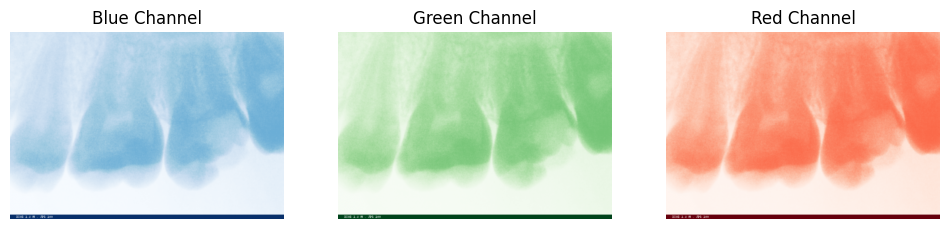

In [66]:
# Split the image into its Red, Green, and Blue channels
(b, g, r) = cv2.split(image)

# Display the channels
plt.figure(figsize=(12, 6))

# Blue channel
plt.subplot(1, 3, 1)
plt.imshow(b, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

# Red channel
plt.subplot(1, 3, 3)
plt.imshow(r, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.show()

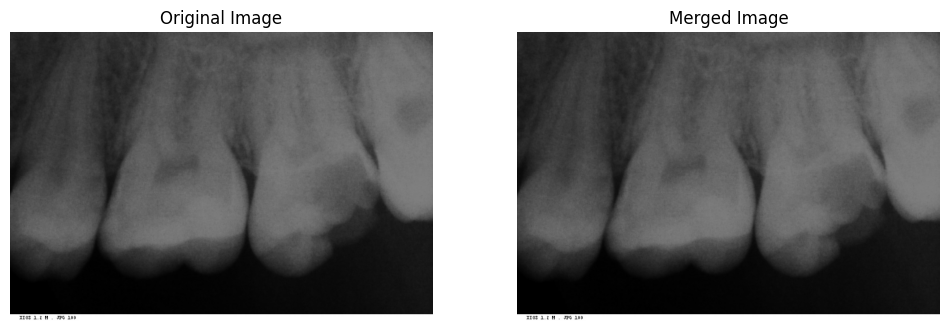

In [67]:
# Merge the channels back together
merged_image = cv2.merge([b, g, r])

# Display the original and merged images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title("Original Image")
plt.axis('off')

# Merged image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title("Merged Image")
plt.axis('off')

plt.show()

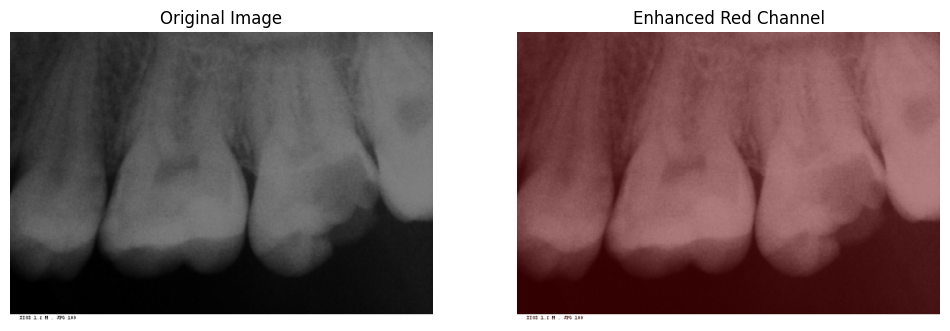

In [68]:
# Enhance the red channel by increasing its intensity
r_enhanced = cv2.add(r, 50)  # Add 50 to all values in the red channel

# Merge the modified channels back together
enhanced_image = cv2.merge([b, g, r_enhanced])

# Display the original and enhanced images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Red Channel")
plt.axis('off')

plt.show()

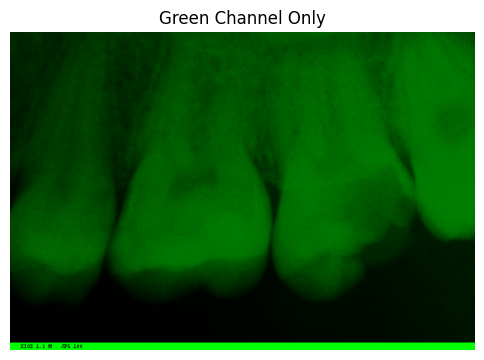

In [69]:
# Set the red and blue channels to zero
green_only = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])

# Display the result
plt.figure(figsize=(6, 6))

# Green-only image
plt.imshow(cv2.cvtColor(green_only, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title("Green Channel Only")
plt.axis('off')

plt.show()

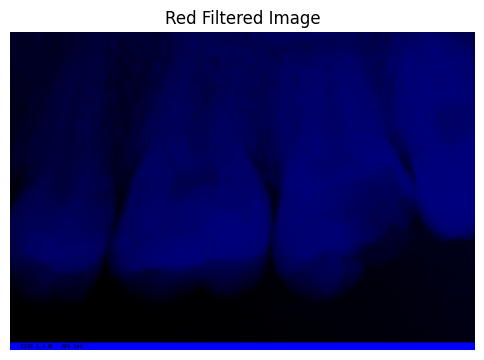

In [70]:
# Create a 'red filter' by setting green and blue channels to zero
red_filter = cv2.merge([r, np.zeros_like(g), np.zeros_like(b)])

# Display the red-filtered image
plt.figure(figsize=(6, 6))

# Red-filtered image
plt.imshow(cv2.cvtColor(red_filter, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title("Red Filtered Image")
plt.axis('off')

plt.show()

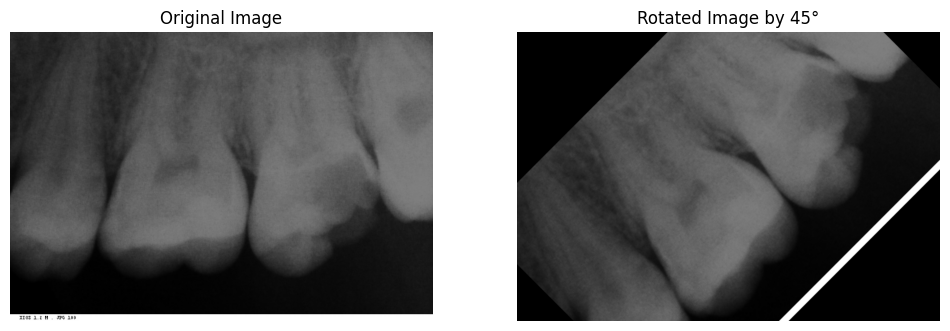

In [71]:
# Get the image dimensions
(height, width) = image.shape[:2]

# Define the center of the image (the point of rotation)
center = (width // 2, height // 2)

# Define the rotation matrix (rotation angle and scaling factor)
angle = 45  # Rotate by 45 degrees
scale = 1.0  # No scaling

# Get the rotation matrix using the center of the image
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the original and rotated images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
plt.title("Original Image")
plt.axis('off')

# Rotated image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
plt.title(f"Rotated Image by {angle}°")
plt.axis('off')

plt.show()

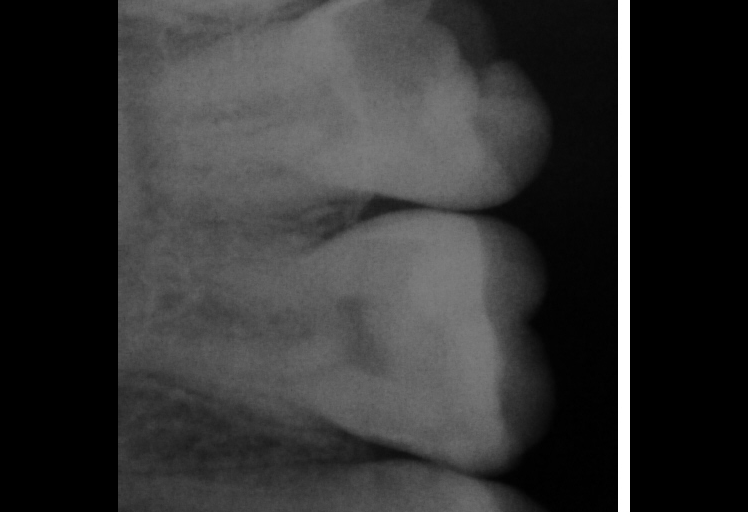

In [73]:
# Angle of rotation (can be any arbitrary angle)
angle = 90  # Rotate by 90 degrees

# Get the rotation matrix (center of rotation, angle, scale)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the rotated image
cv2_imshow(rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

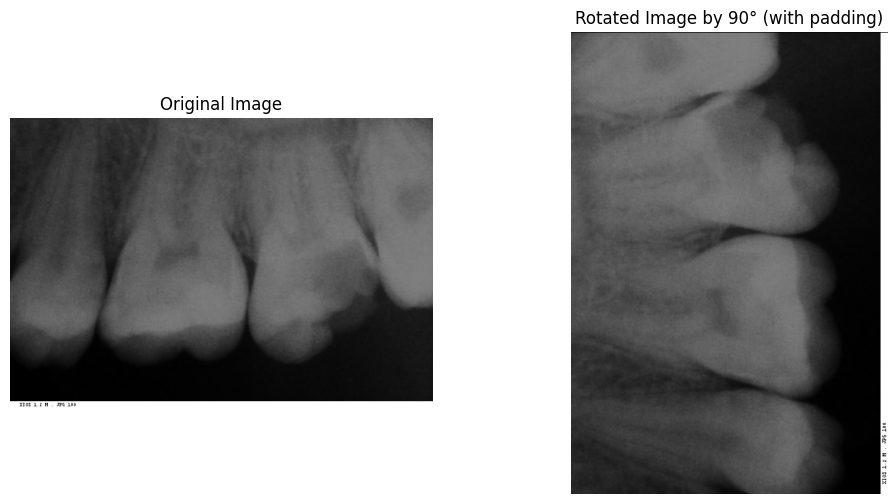

In [74]:
# Calculate the new bounding box dimensions
# First, compute the sine and cosine of the angle
angle_rad = np.deg2rad(angle)  # Convert angle to radians
abs_cos = abs(np.cos(angle_rad))
abs_sin = abs(np.sin(angle_rad))

# Calculate new width and height of the rotated image
new_width = int(height * abs_sin + width * abs_cos)
new_height = int(height * abs_cos + width * abs_sin)

# Adjust the rotation matrix to account for the new image size
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# Apply the rotation with the new size
rotated_image_with_padding = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

# Display the original and padded rotated images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title("Original Image")
plt.axis('off')

# Padded rotated image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image_with_padding, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title(f"Rotated Image by {angle}° (with padding)")
plt.axis('off')

plt.show()

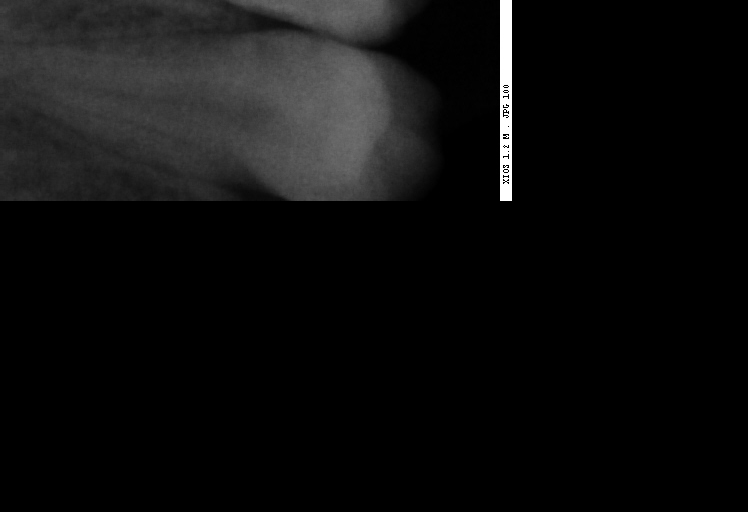

In [76]:
# Define a custom center for rotation (for example, the top-left corner)
custom_center = (100, 100)  # Top-left corner

# Get the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(custom_center, angle, scale)

# Apply the rotation
rotated_image_custom_center = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the rotated image with custom center
cv2_imshow(rotated_image_custom_center)
cv2.waitKey(0)
cv2.destroyAllWindows()

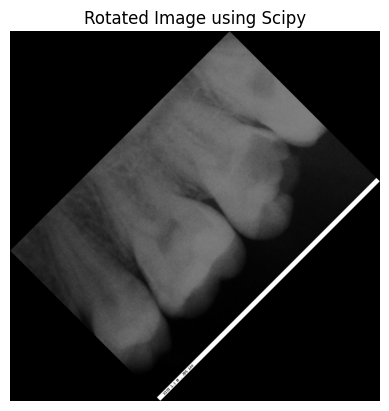

In [77]:
from scipy.ndimage import rotate

# Rotate the image by 45 degrees
rotated_image_scipy = rotate(image, 45, reshape=True)

# Display the result
plt.imshow(cv2.cvtColor(rotated_image_scipy, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title("Rotated Image using Scipy")
plt.axis('off')
plt.show()

Skew Angle: 0.0


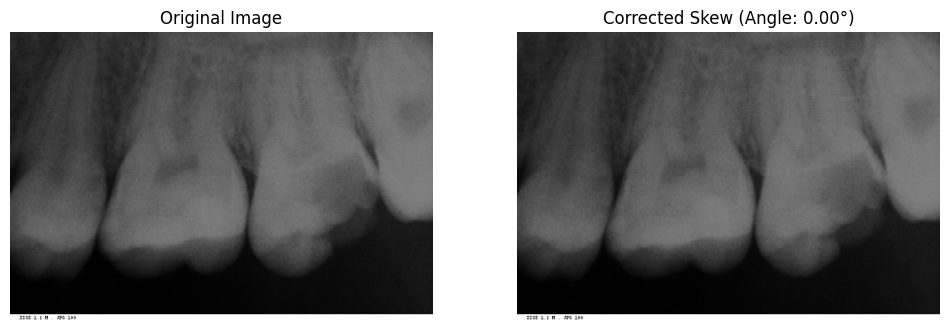

In [78]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Initialize variables for the angle sum and count of lines
angle_sum = 0
line_count = 0

# Loop through all the detected lines
for line in lines:
    for rho, theta in line:
        # Calculate the angle in degrees
        angle = (theta * 180 / np.pi) - 90
        angle_sum += angle
        line_count += 1

# Calculate the average angle of all lines
avg_angle = angle_sum / line_count
print(f"Skew Angle: {avg_angle}")

# Get the rotation matrix
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, avg_angle, 1.0)

# Rotate the image to correct the skew
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Display the original and rotated images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
plt.title("Original Image")
plt.axis('off')

# Rotated image (skew corrected)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
plt.title(f"Corrected Skew (Angle: {avg_angle:.2f}°)")
plt.axis('off')

plt.show()

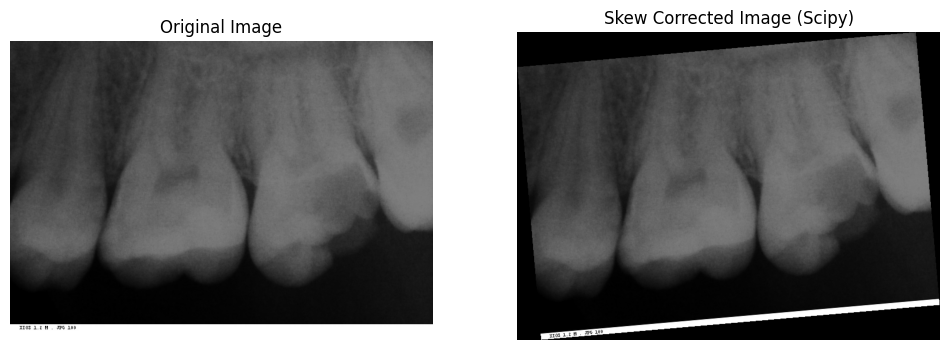

In [83]:
from scipy.ndimage import rotate

# Specify the skew angle you want to correct (e.g., 5 degrees)
angle = 5

# Rotate the image using scipy's rotate function
rotated_image_scipy = rotate(image, angle, reshape=True)

# Display the original and rotated images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
plt.title("Original Image")
plt.axis('off')

# Skew corrected image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image_scipy, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
plt.title(f"Skew Corrected Image (Scipy)")
plt.axis('off')

plt.show()